In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
npts = 1000
xlow = -5.0*np.pi
xhigh = 5.0*np.pi

x = np.linspace(xlow,xhigh,npts)
dt = (xhigh-xlow)/npts

# Calculate the Nyquist frequency

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0

print ('Nyquist frequency = ',f_nyquist)

# the Nyquist frequency corresponds to the highest meaningful frequency component
#
# The terms in the Fourier approximation look like cos(n*np.pi*t/P) or sin(n*np.pi*t/P)
#
# Thus, omega = n*np.pi/P = n*np.pi/xhigh
#       f = omega/(2.0*np.pi) = n/(2.0*xhigh)
#
#       f_nyquist = n_max/(2.0*xhigh)
#
#       n_max = 2.0*xhigh*f_nyquist

nterms = int(2.0*xhigh*f_nyquist)

print ('Max terms = ',nterms)

nterms = 500

Nyquist frequency =  15.915494309189533
Max terms =  500


In [3]:
f_signal = 1.0/(2.0*np.pi)
w = f_signal*2.0*np.pi

fx = []
for i in range(len(x)):
    fx.append(1.0*np.sin(w*x[i]) + 0.8*np.sin(2.0*w*x[i]) + 0.6*np.sin(3.0*w*x[i]) + 0.4*np.sin(4.0*x[i]))

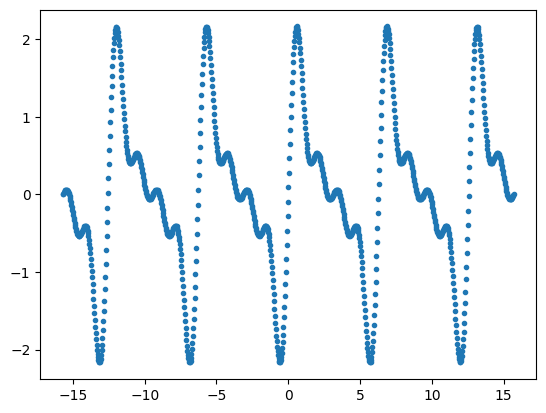

In [4]:
plt.plot(x,fx,'.')

In [5]:
x2 = np.linspace(xlow,xhigh,npts)
fx_fourier = np.zeros(len(x2))

n = []
an = []
bn = []
pn = []
fn = []

for i in range(nterms+1):
    P = xhigh
    n.append(i)
    fn.append(i/(2.0*P))

    # Method 2:  Numerical integration to calculate
    # the coefficients
    
    a0sum = 0.0
    ansum = 0.0
    bnsum = 0.0

    for k in range(len(x2)):
        a0sum = a0sum + 1/P*fx[k]*dt
        ansum = ansum + 1/P*fx[k]*np.cos(i*np.pi*x2[k]/P)*dt
        bnsum = bnsum + 1/P*fx[k]*np.sin(i*np.pi*x2[k]/P)*dt
        
    if (i==0):
        an.append(a0sum)
        bn.append(0)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
    else:
        an.append(ansum)
        bn.append(bnsum)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier[j] = fx_fourier[j]+an[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Data: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,an[i],bn[i]))
            fx_fourier[j] = fx_fourier[j]+an[i]*np.cos(i*np.pi*x2[j]/P)+bn[i]*np.sin(i*np.pi*x2[j]/P)        

Data: n = 1.0000, a_n = -0.0000, bn = -0.0000
Data: n = 2.0000, a_n = 0.0000, bn = -0.0000
Data: n = 3.0000, a_n = -0.0000, bn = -0.0000
Data: n = 4.0000, a_n = 0.0000, bn = 0.0000
Data: n = 5.0000, a_n = 0.0000, bn = 0.9990
Data: n = 6.0000, a_n = 0.0000, bn = 0.0000
Data: n = 7.0000, a_n = 0.0000, bn = -0.0000
Data: n = 8.0000, a_n = 0.0000, bn = -0.0000
Data: n = 9.0000, a_n = -0.0000, bn = -0.0000
Data: n = 10.0000, a_n = 0.0000, bn = 0.7992


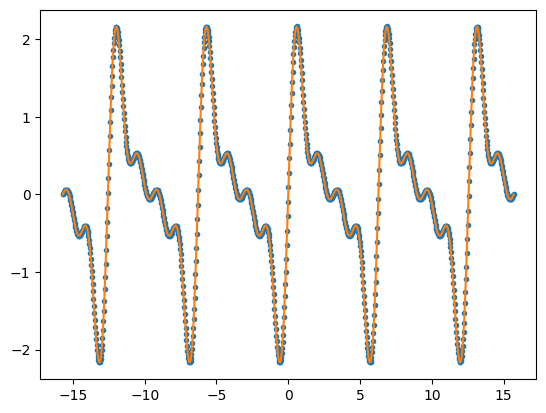

In [6]:
plt.plot(x,fx,'.')
plt.plot(x2,fx_fourier)

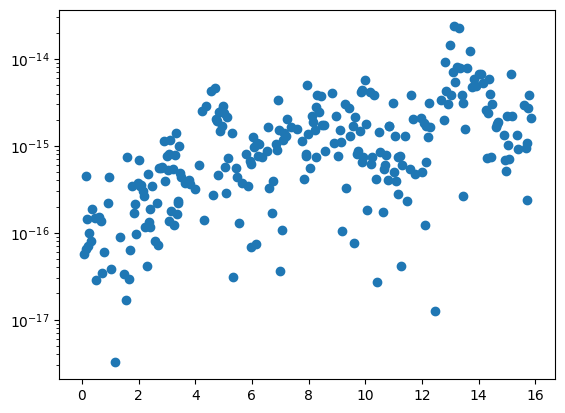

In [7]:
plt.plot(fn,an,'o')
plt.yscale("log")

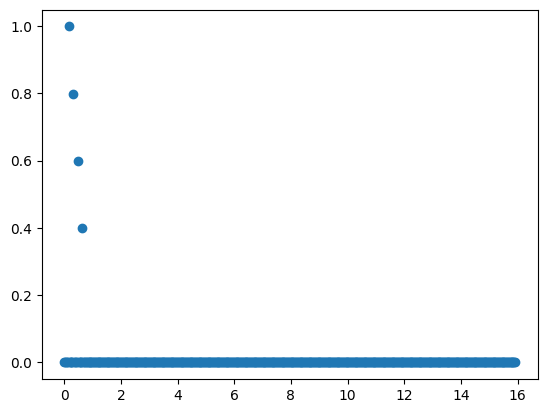

In [8]:
plt.plot(fn,bn,'o')

(0.0, 2.0)

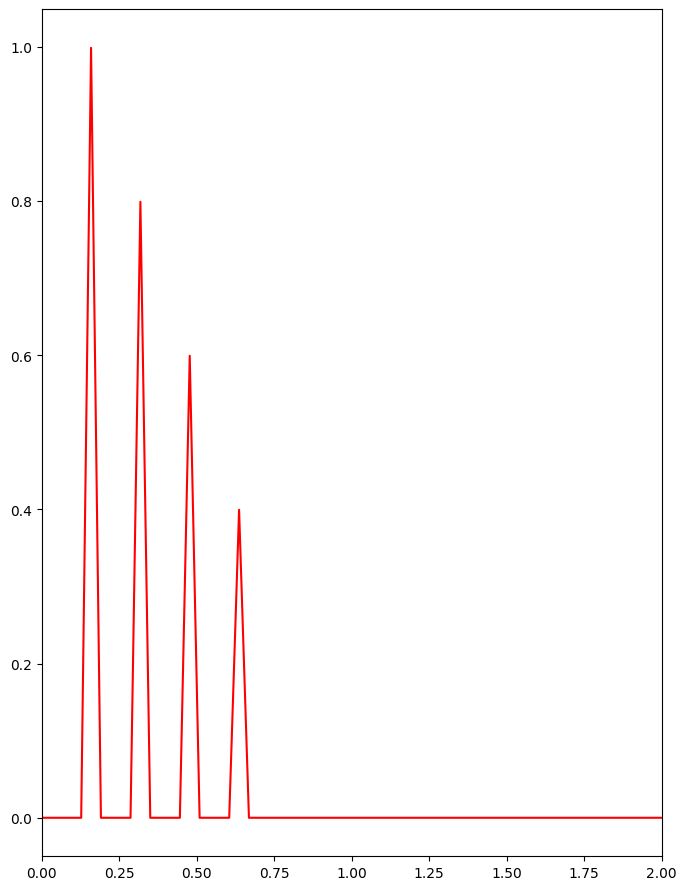

In [9]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11))
axs2.plot(fn,pn,'r-')
axs2.set_xlim(0.0,2)

In [10]:
import pandas as pd
from sodapy import Socrata
client = Socrata("data.virginia.gov", None)
results = client.get("bre9-aqqr", limit=30000)
results_df = pd.DataFrame.from_records(results)

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [11]:
results_df['date'] = pd.to_datetime(results_df['report_date'])
results_df['date_delta'] = (results_df['date'] - results_df['date'].min())  / np.timedelta64(1,'D')

results_df['total_casesI'] = pd.to_numeric(results_df['total_cases'])

total_case_values = results_df['total_casesI'].values
new_cases = []
new_cases.append(0)
for i in range(1,len(results_df)):
    new_cases.append(total_case_values[i]-total_case_values[i-1]) 

results_df['new_cases']=new_cases
results_df.head()

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths,date,date_delta,total_casesI,new_cases
0,2024-01-16T00:00:00.000,51001,Accomack,Eastern Shore,10160,523,139,2024-01-16,225.0,10160,0
1,2024-01-16T00:00:00.000,51003,Albemarle,Blue Ridge,27301,511,220,2024-01-16,225.0,27301,17141
2,2024-01-16T00:00:00.000,51005,Alleghany,Alleghany,5129,126,113,2024-01-16,225.0,5129,-22172
3,2024-01-16T00:00:00.000,51007,Amelia,Piedmont,3903,194,65,2024-01-16,225.0,3903,-1226
4,2024-01-16T00:00:00.000,51009,Amherst,Central Virginia,10671,532,123,2024-01-16,225.0,10671,6768


/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_91806/2797640873.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df4['new_cases']=new_cases


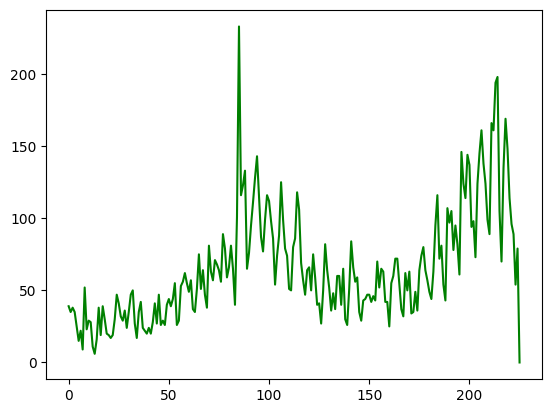

In [12]:
results_df4 = results_df[results_df.locality == 'Fairfax']
#plt.plot(results_df4['date_delta'],results_df4['total_casesI'],'g-')
total_case_values = results_df4['total_casesI'].values
new_cases = []
new_cases.append(0)
for i in range(1,len(results_df4)):
    new_cases.append(total_case_values[i-1]-total_case_values[i]) 
results_df4['new_cases']=new_cases
plt.plot(results_df4['date_delta'],results_df4['new_cases'],'g-')

In [13]:
tmin = results_df4['date_delta'].min()
tmax = results_df4['date_delta'].max()
tbar = (tmax-tmin)/2.0

results_df4['time']=results_df4['date_delta']-tbar

/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_91806/636070870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df4['time']=results_df4['date_delta']-tbar


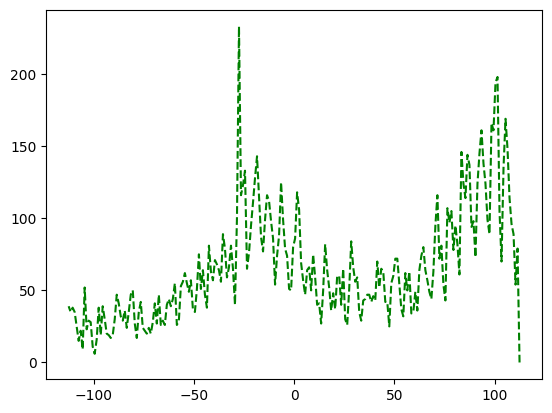

In [14]:
plt.plot(results_df4['time'],results_df4['new_cases'],'g--')

In [15]:
npts = len(results_df4)
xlow = results_df4['time'].min()
xhigh = results_df4['time'].max()

x = np.linspace(xlow,xhigh,npts)
dt = (xhigh-xlow)/(npts-1)

print (xlow,xhigh,dt)

# Calculate the Nyquist frequency

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0

print ('Nyquist frequency = ',f_nyquist)

# the Nyquist frequency corresponds to the highest meaningful frequency component
#
# The terms in the Fourier approximation look like cos(n*np.pi*t/P) or sin(n*np.pi*t/P)
#
# Thus, omega = n*np.pi/P = n*np.pi/xhigh
#       f = omega/(2.0*np.pi) = n/(2.0*xhigh)
#
#       f_nyquist = n_max/(2.0*xhigh)
#
#       n_max = 2.0*xhigh*f_nyquist

nterms = int(2.0*xhigh*f_nyquist)

print ('Max terms = ',nterms)

nterms = 106

-112.5 112.5 1.0
Nyquist frequency =  0.5
Max terms =  112


In [16]:
fx = results_df4['new_cases'].values
fx = np.flip(fx)

In [17]:
x2 = np.linspace(xlow,xhigh,npts)
fx_fourier = np.zeros(len(x2))

n = []
an = []
bn = []
pn = []
fn = []

for i in range(nterms+1):
    P = xhigh
    n.append(i)
    fn.append(i/(2.0*P))

    # Method 2:  Numerical integration to calculate
    # the coefficients
    
    a0sum = 0.0
    ansum = 0.0
    bnsum = 0.0

    for k in range(len(x2)):
        a0sum = a0sum + 1/P*fx[k]*dt
        ansum = ansum + 1/P*fx[k]*np.cos(i*np.pi*x2[k]/P)*dt
        bnsum = bnsum + 1/P*fx[k]*np.sin(i*np.pi*x2[k]/P)*dt
        
    if (i==0):
        an.append(a0sum)
        bn.append(0)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
    else:
        an.append(ansum)
        bn.append(bnsum)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier[j] = fx_fourier[j]+an[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Data: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,an[i],bn[i]))
            fx_fourier[j] = fx_fourier[j]+an[i]*np.cos(i*np.pi*x2[j]/P)+bn[i]*np.sin(i*np.pi*x2[j]/P)     

Data: n = 1.0000, a_n = 2.0346, bn = 9.8142
Data: n = 2.0000, a_n = 14.6041, bn = -34.7856
Data: n = 3.0000, a_n = -0.7146, bn = 8.3720
Data: n = 4.0000, a_n = -6.3223, bn = -15.6775
Data: n = 5.0000, a_n = 1.8314, bn = 6.1222
Data: n = 6.0000, a_n = -4.5524, bn = -4.9330
Data: n = 7.0000, a_n = 1.4883, bn = 7.5053
Data: n = 8.0000, a_n = 0.2372, bn = -2.2192
Data: n = 9.0000, a_n = 4.5295, bn = 2.0681
Data: n = 10.0000, a_n = 0.0135, bn = -1.0504


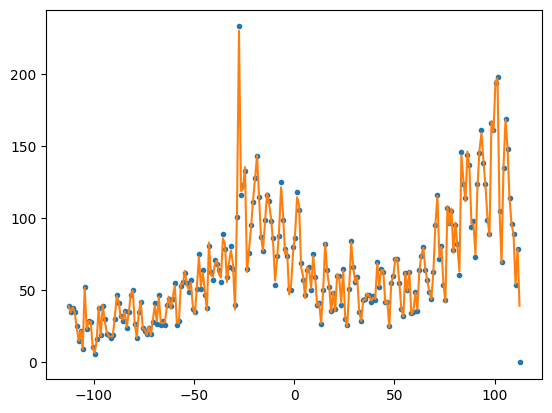

In [18]:
plt.plot(x,fx,'.')
plt.plot(x2,fx_fourier)

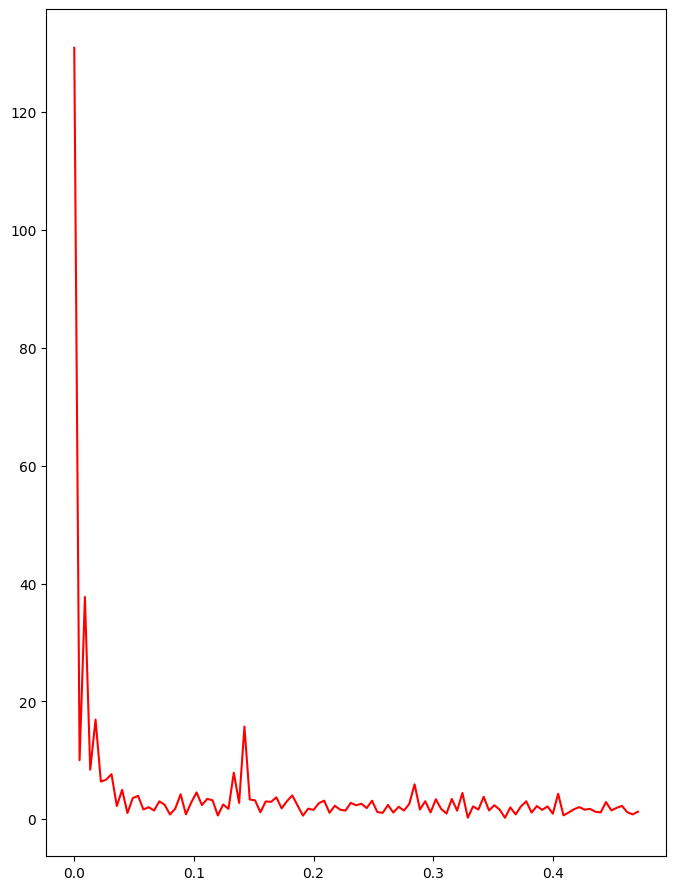

In [19]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11))
axs2.plot(fn,pn,'r-')
#axs2.set_xlim(0.0,2.0)

In [20]:
import os
os.chdir("/Users/brash/phys340/JupyterNotebooks/Fourier_Series/")
df = pd.read_csv('US.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16020 entries, 0 to 16019
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  16020 non-null  object 
 1   state            16020 non-null  object 
 2   tot_cases        16020 non-null  int64  
 3   conf_cases       5566 non-null   float64
 4   prob_cases       5566 non-null   float64
 5   new_case         16020 non-null  int64  
 6   pnew_case        10756 non-null  float64
 7   tot_death        16020 non-null  int64  
 8   conf_death       5923 non-null   float64
 9   prob_death       5923 non-null   float64
 10  new_death        16020 non-null  int64  
 11  pnew_death       10754 non-null  float64
 12  created_at       16020 non-null  object 
 13  consent_cases    13083 non-null  object 
 14  consent_deaths   13350 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 1.8+ MB


In [22]:
df['date'] = pd.to_datetime(df['submission_date'])    
df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16020 entries, 0 to 16019
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  16020 non-null  object        
 1   state            16020 non-null  object        
 2   tot_cases        16020 non-null  int64         
 3   conf_cases       5566 non-null   float64       
 4   prob_cases       5566 non-null   float64       
 5   new_case         16020 non-null  int64         
 6   pnew_case        10756 non-null  float64       
 7   tot_death        16020 non-null  int64         
 8   conf_death       5923 non-null   float64       
 9   prob_death       5923 non-null   float64       
 10  new_death        16020 non-null  int64         
 11  pnew_death       10754 non-null  float64       
 12  created_at       16020 non-null  object        
 13  consent_cases    13083 non-null  object        
 14  consent_deaths   13350 non-null  objec

/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_91806/3371631905.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['submission_date'])


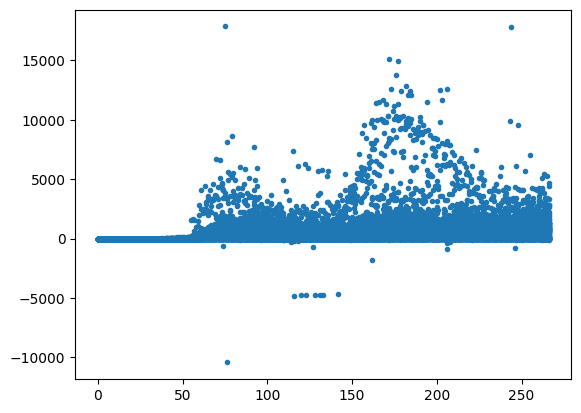

In [23]:
plt.plot(df['date_delta'],df['new_case'],'.')

266


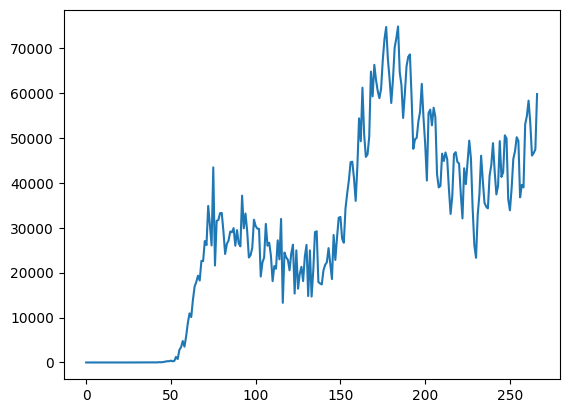

In [24]:
daymax = int(df['date_delta'].values.max())
print (daymax)

newsumbyday = [0 for i in range(0,daymax+1)]
day = [i for i in range(0,daymax+1)]

for i in range(len(df)):
    current_day = int(df['date_delta'].values[i])
    newsumbyday[current_day] += df['new_case'].values[i]
    
plt.plot(day,newsumbyday,'-')

In [25]:
tmin = np.min(day)
tmax = np.max(day)
tbar = (tmax-tmin)/2.0

day=day-tbar

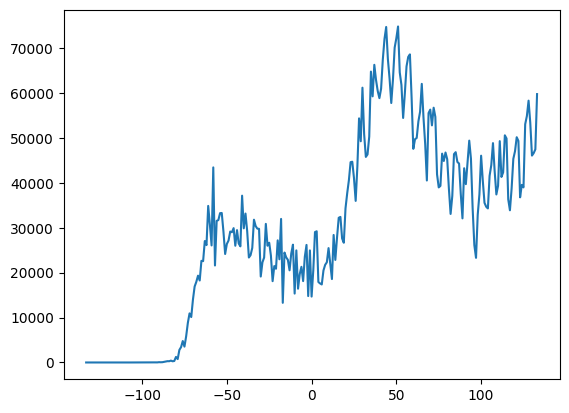

In [26]:
plt.plot(day,newsumbyday,'-')
fx = newsumbyday

In [27]:
npts = len(day)
xlow = np.min(day)
xhigh = np.max(day)

x = np.linspace(xlow,xhigh,npts)
dt = (xhigh-xlow)/(npts-1)

print (xlow,xhigh,dt)

# Calculate the Nyquist frequency

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0

print ('Nyquist frequency = ',f_nyquist)

# the Nyquist frequency corresponds to the highest meaningful frequency component
#
# The terms in the Fourier approximation look like cos(n*np.pi*t/P) or sin(n*np.pi*t/P)
#
# Thus, omega = n*np.pi/P = n*np.pi/xhigh
#       f = omega/(2.0*np.pi) = n/(2.0*xhigh)
#
#       f_nyquist = n_max/(2.0*xhigh)
#
#       n_max = 2.0*xhigh*f_nyquist

nterms = int(2.0*xhigh*f_nyquist)

print ('Max terms = ',nterms)

nterms = int(133)

-133.0 133.0 1.0
Nyquist frequency =  0.5
Max terms =  133


In [28]:
x2 = np.linspace(xlow,xhigh,npts)
fx_fourier = np.zeros(len(x2))

n = []
an = []
bn = []
pn = []
fn = []

for i in range(nterms+1):
    P = xhigh
    n.append(i)
    fn.append(i/(2.0*P))

    # Method 2:  Numerical integration to calculate
    # the coefficients
    
    a0sum = 0.0
    ansum = 0.0
    bnsum = 0.0

    for k in range(len(x2)):
        a0sum = a0sum + 1/P*fx[k]*dt
        ansum = ansum + 1/P*fx[k]*np.cos(i*np.pi*x2[k]/P)*dt
        bnsum = bnsum + 1/P*fx[k]*np.sin(i*np.pi*x2[k]/P)*dt
        
    if (i==0):
        an.append(a0sum)
        bn.append(0)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
    else:
        an.append(ansum)
        bn.append(bnsum)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier[j] = fx_fourier[j]+an[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Data: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,an[i],bn[i]))
            fx_fourier[j] = fx_fourier[j]+an[i]*np.cos(i*np.pi*x2[j]/P)+bn[i]*np.sin(i*np.pi*x2[j]/P)     

Data: n = 1.0000, a_n = 6727.3118, bn = 21542.1474
Data: n = 2.0000, a_n = -6914.4776, bn = -5396.9325
Data: n = 3.0000, a_n = -10619.6303, bn = 4618.4223
Data: n = 4.0000, a_n = -228.1728, bn = -4653.1868
Data: n = 5.0000, a_n = 1316.1034, bn = 1359.7774
Data: n = 6.0000, a_n = 630.4871, bn = -4317.0608
Data: n = 7.0000, a_n = -695.1708, bn = 2827.1891
Data: n = 8.0000, a_n = 632.1025, bn = -1224.8353
Data: n = 9.0000, a_n = 137.8234, bn = 1041.5061
Data: n = 10.0000, a_n = 337.2742, bn = -2181.3652


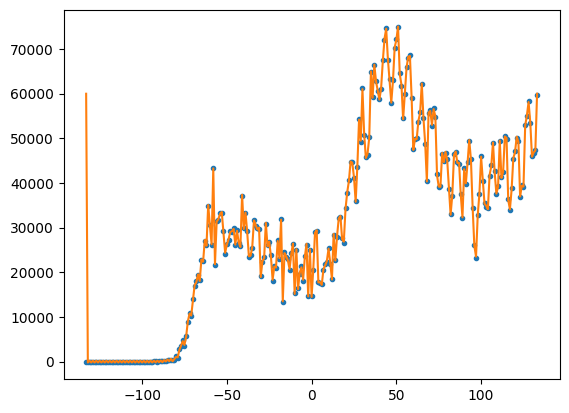

In [29]:
plt.plot(x,fx,'.')
plt.plot(x2,fx_fourier)

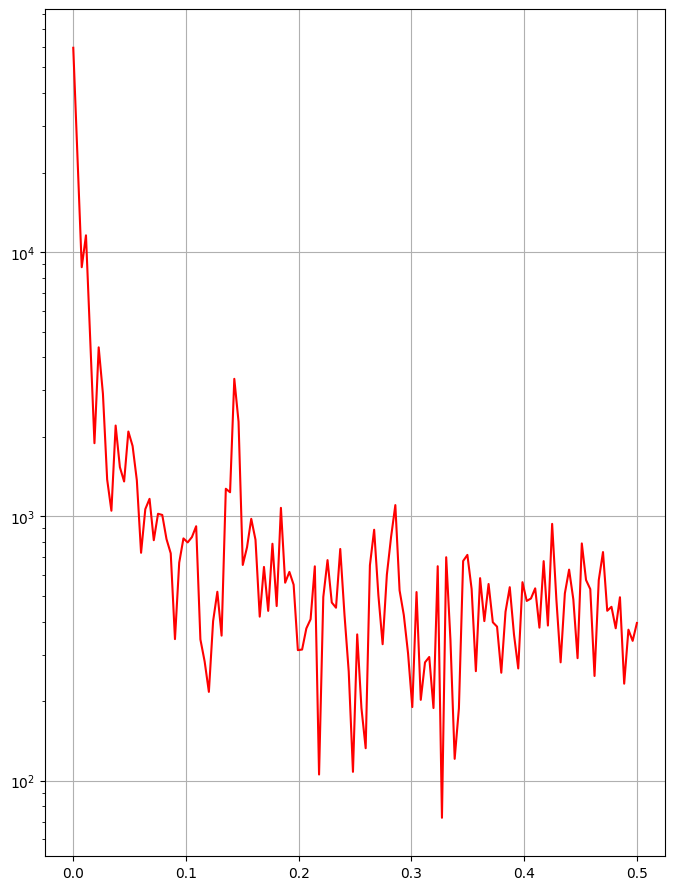

In [35]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11))
axs2.plot(fn,pn,'r-')
axs2.set_yscale('log')

# turn on grid
axs2.grid(True)

once_per_week = 1.0/7.0

# Draw a vertical line at the once per week frequency
#axs2.axvline(x=once_per_week, color='k', linestyle='--')